<a href="https://colab.research.google.com/github/RidaKhan24/ML-project/blob/main/LoanDefaultPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
#from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline
sns.set(rc={'figure.figsize':[4,4]}, font_scale=0.9)

In [3]:
df = pd.read_csv('Loan Default.csv')
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
df.rename(columns={'Defaulted?':'Defaulted'},inplace=True)
df.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted'], dtype='object')

In [5]:
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted        0
dtype: int64

In [6]:
cols_to_check = [ 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted']

# check for duplicate rows
duplicates = df.duplicated(subset=cols_to_check, keep=False)

# count the duplicates
num_duplicates = duplicates.sum()

num_duplicates

0

In [7]:
cols_to_check = ['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted']

# check for missing values
missing_values = df[cols_to_check].isnull()

# count the missing values
num_missing_values = missing_values.sum()
missing_values.sum()

# visualize the missing values
#sns.heatmap(missing_values, cmap='viridis')

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted        0
dtype: int64

In [8]:
df.drop('Index',axis=1,inplace=True)
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


<Axes: xlabel='Defaulted', ylabel='count'>

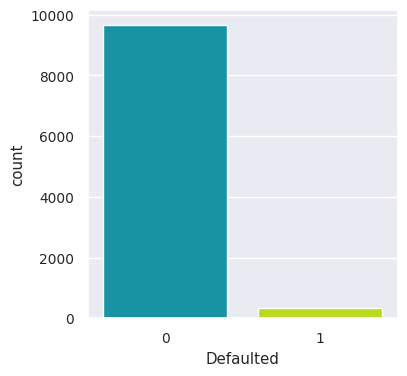

In [9]:
sns.countplot(x='Defaulted',data=df,palette='nipy_spectral')

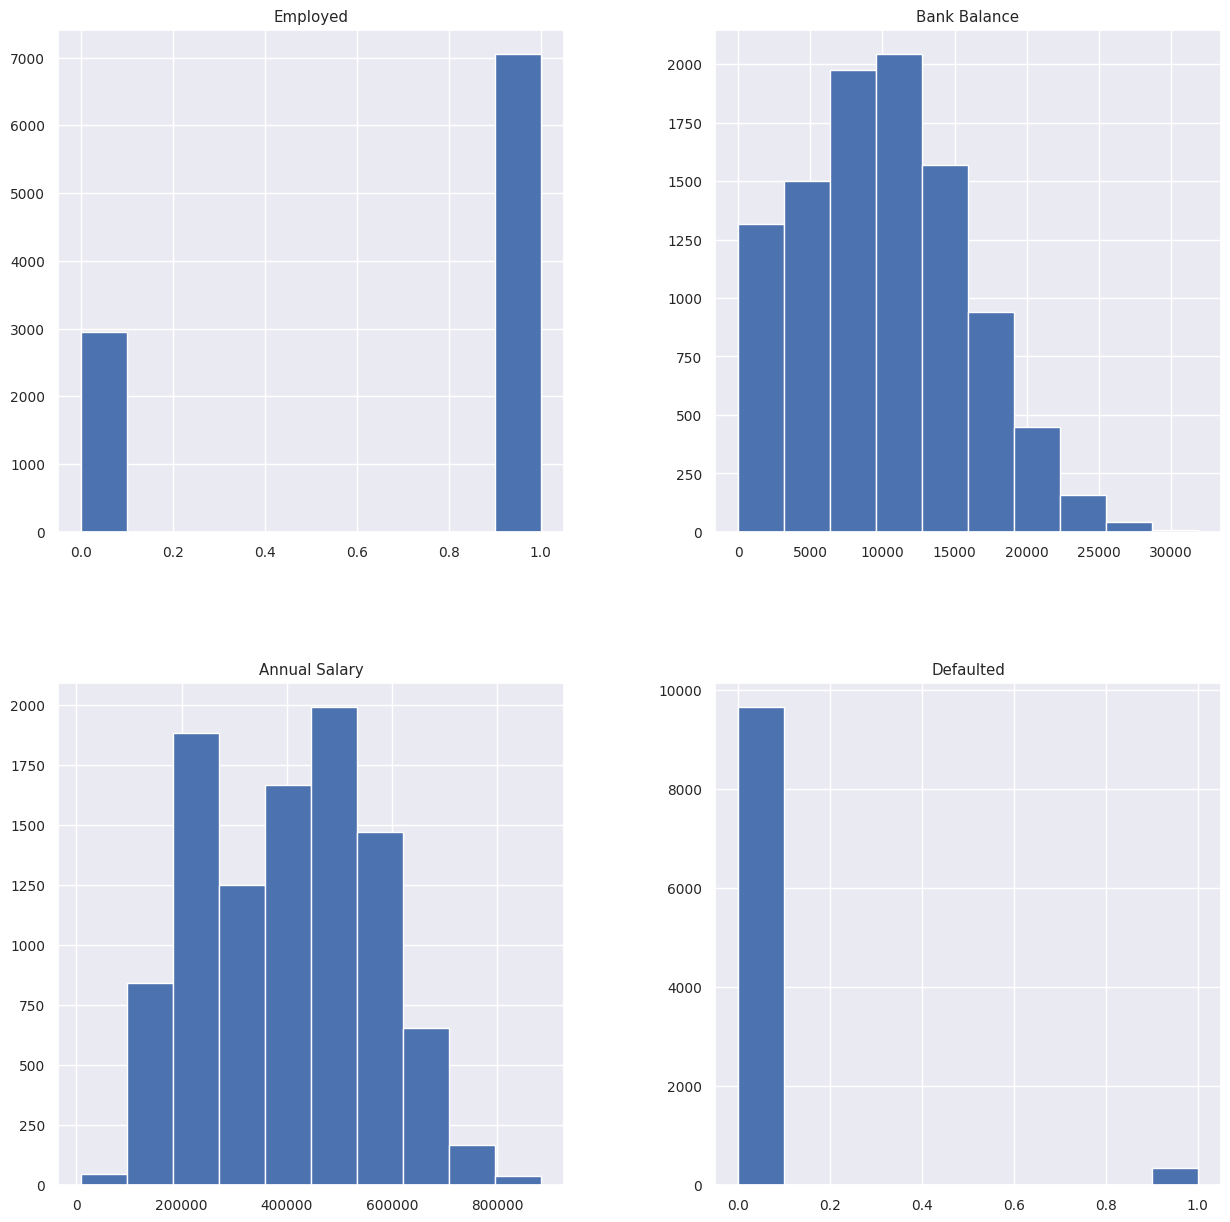

In [10]:
df.hist(figsize=(15,15))
plt.show()

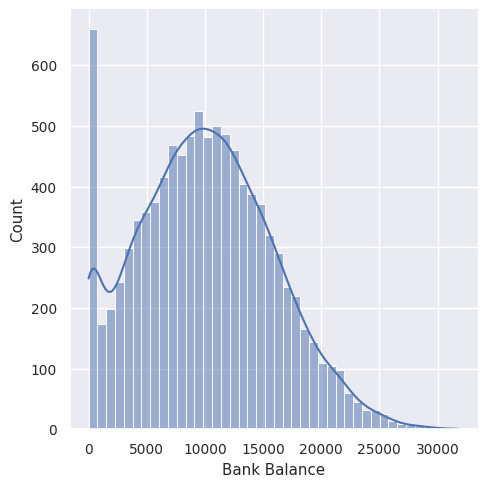

In [11]:
sns.displot(df['Bank Balance'],kde=True)

<Axes: xlabel='Bank Balance', ylabel='Density'>

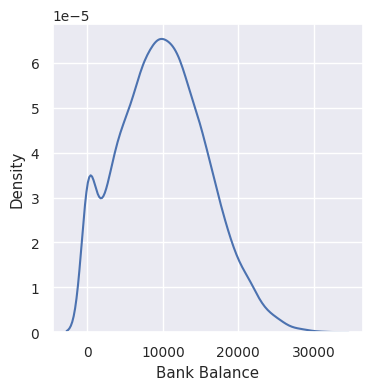

In [12]:
sns.kdeplot(df["Bank Balance"])

<Axes: ylabel='Employed'>

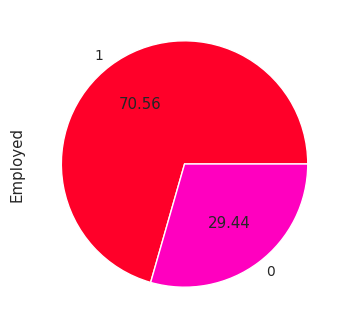

In [13]:
df["Employed"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

<Axes: ylabel='Defaulted'>

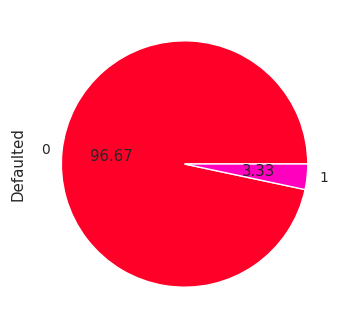

In [14]:
df["Defaulted"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

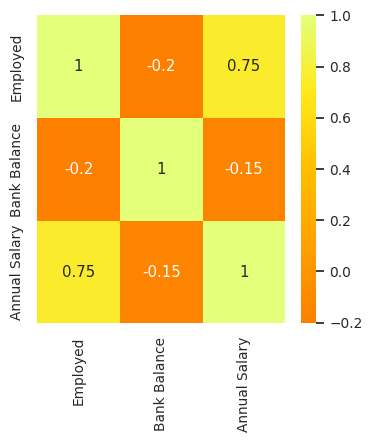

In [15]:
# correlation Matrix
x=df.drop('Defaulted',axis=1)
y=df.Defaulted
corre = x.corr()
sns.heatmap(corre,annot=True,cmap="Wistia_r")
plt.show()

In [16]:
x

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00
...,...,...,...
9995,1,8538.72,635908.56
9996,1,9095.52,235928.64
9997,1,10144.92,703633.92
9998,1,18828.12,440029.32


<Axes: xlabel='Defaulted', ylabel='count'>

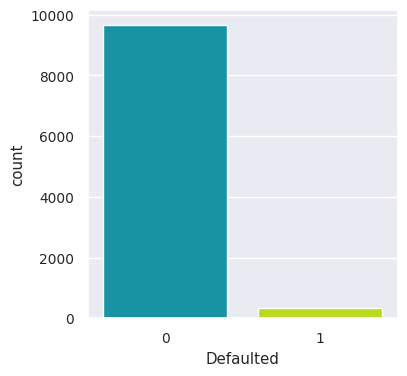

In [17]:
sns.countplot(x='Defaulted',data=df,palette='nipy_spectral')

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
x1 = scaler.fit_transform(x)
x1

array([[1.        , 0.27484629, 0.59890501],
       [0.        , 0.30786793, 0.15572696],
       [1.        , 0.40445387, 0.4258616 ],
       ...,
       [1.        , 0.31850342, 0.79503151],
       [1.        , 0.59111562, 0.49321277],
       [0.        , 0.07569547, 0.22108382]])

In [19]:
X,test,Y,OT = train_test_split(x,y,test_size = 0.2,random_state=1)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=1)

print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)


X_train: (6400, 3)
X_test: (1600, 3)
Y_train: (6400,)
Y_test: (1600,)


In [21]:
k = (len(x_train)**(0.5))//2
k

40.0

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predicted=[]
def model_evaluate(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    cm=confusion_matrix(y_test, y_pred)
    print(cm)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(tn, fp, fn, tp)
    print(model)
    
    print(classification_report(y_test,y_pred,zero_division=1))
    predicted.append(accuracy_score(y_test,y_pred))
key = ["Logistic Regression",'K-Neighbors Classifier','Random Forest Classifier','Gradient Boosting Classifier']
value=[LogisticRegression(),KNeighborsClassifier(n_neighbors = 44, weights ='uniform'), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20)]
models = dict(zip(key,value))
models

{'Logistic Regression': LogisticRegression(),
 'K-Neighbors Classifier': KNeighborsClassifier(n_neighbors=44),
 'Random Forest Classifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=20)}

In [23]:
model_evaluate(models[key[0]])

[[1538    2]
 [  60    0]]
1538 2 60 0
LogisticRegression()
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1540
           1       0.00      0.00      0.00        60

    accuracy                           0.96      1600
   macro avg       0.48      0.50      0.49      1600
weighted avg       0.93      0.96      0.94      1600



In [24]:
model_evaluate(models[key[1]])

[[1540    0]
 [  60    0]]
1540 0 60 0
KNeighborsClassifier(n_neighbors=44)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1540
           1       1.00      0.00      0.00        60

    accuracy                           0.96      1600
   macro avg       0.98      0.50      0.49      1600
weighted avg       0.96      0.96      0.94      1600



In [25]:
model_evaluate(models[key[2]])

[[1531    9]
 [  33   27]]
1531 9 33 27
RandomForestClassifier(n_estimators=60, random_state=0)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1540
           1       0.75      0.45      0.56        60

    accuracy                           0.97      1600
   macro avg       0.86      0.72      0.77      1600
weighted avg       0.97      0.97      0.97      1600



In [26]:
model_evaluate(models[key[3]])

[[1524   16]
 [  34   26]]
1524 16 34 26
GradientBoostingClassifier(random_state=20)
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1540
           1       0.62      0.43      0.51        60

    accuracy                           0.97      1600
   macro avg       0.80      0.71      0.75      1600
weighted avg       0.96      0.97      0.97      1600



In [27]:
mod = pd.DataFrame({'Models':key,'Accuracies' : predicted})
mod

,Models,Accuracies
0,Logistic Regression,0.96125
1,K-Neighbors Classifier,0.96250
2,Random Forest Classifier,0.97375
3,Gradient Boosting Classifier,0.96875


In [28]:
test

,Employed,Bank Balance,Annual Salary
9953,0,9318.48,170756.76
3850,1,12175.20,617264.52
4962,1,8180.28,399925.32
3886,0,11638.80,215281.44
5437,0,18924.96,182769.84
...,...,...,...
3919,1,15482.28,442787.16
162,1,11858.52,582844.32
7903,0,16826.52,191570.52
2242,1,11704.08,609012.48


In [29]:
output = models[key[3]].predict(test)

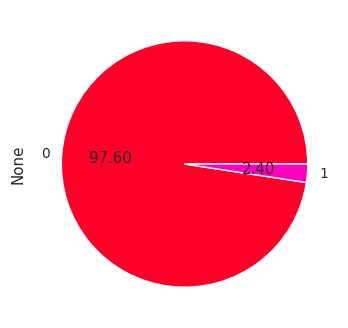

In [30]:
output_series = pd.Series(output)

# Count the frequency of each unique value and plot as a pie chart
output_series.value_counts().plot(kind = "pie", autopct = "%.2f", cmap = "gist_rainbow")

plt.show()

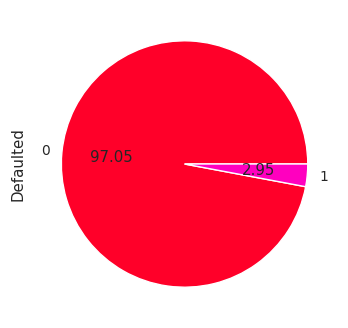

In [31]:
# Output verification through testing data
output_series = pd.Series(OT)

# Count the frequency of each unique value and plot as a pie chart
output_series.value_counts().plot(kind = "pie", autopct = "%.2f", cmap = "gist_rainbow")
plt.show()


In [32]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 k

In [33]:
import gradio as gr

In [34]:
import pandas as pd
import gradio as gr

def predict_loan_defaulted(Employed,Bank_Balance,Annual_Salary):
    # create a DataFrame with the input data
    data = pd.DataFrame({
        'Employed': [Employed],
        'Bank Balance': [Bank_Balance],
        'Annual Salary': [Annual_Salary]
    })
    # make a prediction using the machine learning model
    prediction = models[key[3]].predict(data)
    # return the prediction as a text message
    if prediction == 0:
        return 'Loan will not be defaulted'
    if prediction == 1:
        return 'YES, Loan will be defaulted'

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_loan_defaulted,
    inputs=[
        gr.inputs.Radio(choices=[(0, 'No'), (1, 'Yes')], label='Employed'),
        gr.inputs.Number(label='Bank Balance'),
        gr.inputs.Number(label='Annual Salary')
    ],
    outputs=gr.outputs.Textbox(label='Loan Default Prediction')
)

# Launch the interface
interface.launch(debug=True)

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:183: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
